1. Dealing with errors
2. Annotating code
3. Generating code snippets

Using `xarray` or some NetCDF file.

In [ ]:
import rioxarray as rioxr

Initially got an error message not being able to opend the file because of missing an engine. 

```
xr.open_dataset('NSIDC0079_SEAICE_PS_N25km_202001_v4.0.nc', engine="netcdf4")
```

Followed instructions from xarray website to troubleshoot:
https://docs.xarray.dev/en/stable/user-guide/io.html
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

These links were given by the error. 
Installed necdf4 in current environment.

Then I switched to `rioxarray` because `xarray` did not parse the geospatial info directly.

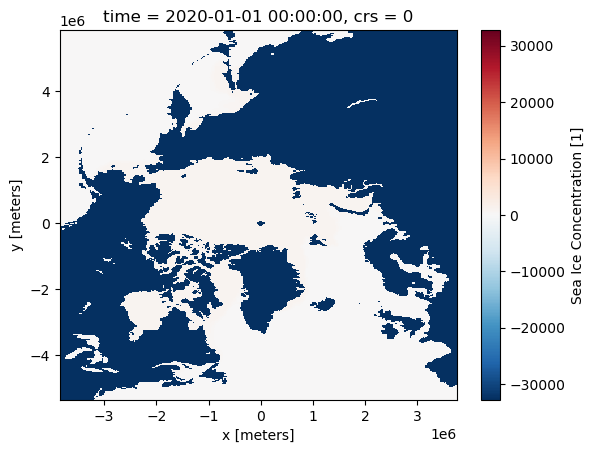

In [3]:
data = rioxr.open_rasterio('NSIDC0079_SEAICE_PS_N25km_202001_v4.0.nc')
data.plot()

In [4]:
data

<xarray.DataArray 'F17_ICECON' (time: 1, y: 448, x: 304)> Size: 272kB
[136192 values with dtype=int16]
Coordinates:
  * x        (x) float64 2kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
  * y        (y) float64 4kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * time     (time) object 8B 2020-01-01 00:00:00
    crs      int64 8B 0
Attributes: (12/65)
    acknowledgment:                  These data are produced by the NASA Cryo...
    cdm_data_type:                   Grid
    citation:                        Comiso, J.C., Gersten, R.A. (2023). Boot...
    contributor_name:                Joey Comiso, Robert Gersten, Hannah Wilc...
    contributor_role:                project_scientist, project_scientist, sc...
    Conventions:                     CF-1.10, ACDD-1.3
    ...                              ...
    flag_meanings:                   missing land
    packing_convention:              netCDF
    packing_convention_description:  unpacked = scale_factor*packed + add_offset
    scale_factor:                    0.001
    add_offset:                      0.0
    _FillValue:                      -32767

In [19]:
# Investigate if there are pixels with missing data
print(f"Number of pixels with missing data: {(data==1100).sum().item()}")
print(f"Number of pixels with primarily land or permanent ice-shelf: {(data==1200).sum().item()}")

Number of pixels with missing data: 0
Number of pixels with primarily land or permanent ice-shelf: 0
